In [1]:
# Done with Alexandra Nagy. 

In [2]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [4]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

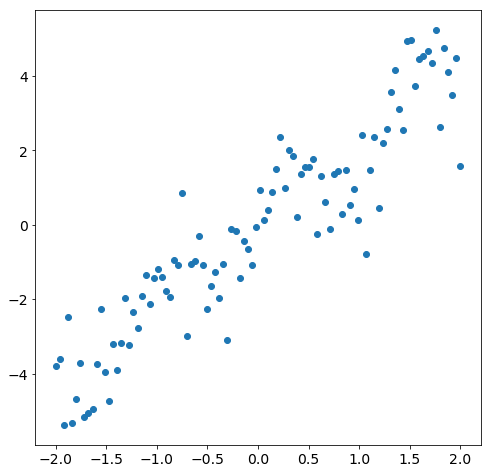

In [7]:
x, y = make_regression()
plt.scatter(x,y)
plt.show()

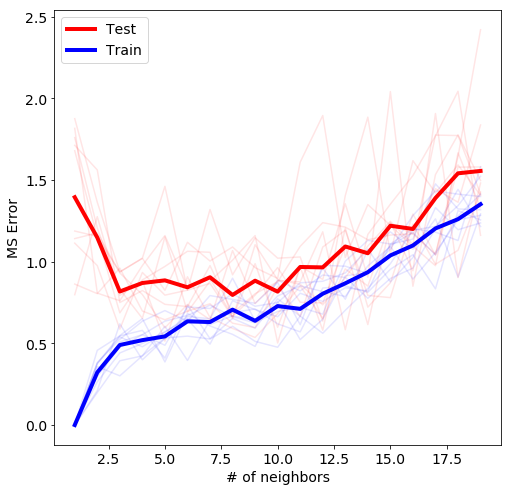

In [18]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

acc_mean_test = []
acc_mean_train = []
rge = np.arange(1,20,1)
for n in range(10):
    X, y = make_regression(n_samples=100, noise_level=0.8, random_state=1+n)
    train_acc = []
    test_acc = []
    for k in rge:
        rgr = KNeighborsRegressor(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
        rgr.fit(X_train,y_train)
        train_acc.append(mean_squared_error(y_train, rgr.predict(X_train)))
        test_acc.append(mean_squared_error(y_test, rgr.predict(X_test)))
    
    acc_mean_test.append(test_acc)
    acc_mean_train.append(train_acc)
    plt.plot(rge, train_acc, c='b', alpha = 0.1)
    plt.plot(rge, test_acc, c='r', alpha = 0.1)

plt.plot(rge, np.array(acc_mean_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(rge, np.array(acc_mean_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('# of neighbors')
plt.ylabel('MS Error')
plt.legend(loc='best')
plt.show()